**Table of contents**<a id='toc0_'></a>    
1. [Study on **AirBnB** data from the city of Vancouver.](#toc1_)    
1.1. [Import of libraries, visualization and processing of datasets.](#toc1_1_)    
1.2. [Processing Null Values.](#toc1_2_)    
1.2.1. [Data processing with KNN.](#toc1_2_1_)                
1.2.2. [Outliers processing.](#toc1_2_2_)      
1.3. [Exploratory Analysis.](#toc1_3_)                  
1.3.1. [Geographical Visual Representation of Data.](#toc1_3_1_)              
1.3.1.1. [Map of Accommodations Location.](#toc1_3_1_1_)               
1.3.1.2. [Average Price Map by Neighborhood.](#toc1_3_1_2_)           
1.3.1.3. [Heat Map of Accommodation Prices.](#toc1_3_1_3_)              
1.3.2. [Types of Properties, Accommodations and Number of Guests.](#toc1_3_2_)     
1.3.2.1. [Property Types.](#toc1_3_2_1_)                   
1.3.2.2. [Number of Listings by Room Type.](#toc1_3_2_2_)               
1.3.2.3. [Number of Accomodates Allowed in Listings.](#toc1_3_2_3_)         
1.3.3. [Neighborhood Data.](#toc1_3_3_)                       
1.3.3.1. [Number of Listings by Neighborhood.](#toc1_3_3_1_)           
1.3.3.2. [Neighborhood Average Price.](#toc1_3_3_2_)                
1.3.3.3. [Neighborhood Average Review Score.](#toc1_3_3_3_)            
1.3.4. [Hosts' Relevant Information.](#toc1_3_4_)             
1.3.4.1. [Response Rate.](#toc1_3_4_1_)                  
1.3.4.2. [Response Time.](#toc1_3_4_2_)                 
1.3.4.3. [Superhost Distribution.](#toc1_3_4_3_)             
1.3.4.4. [Superhost-Price Correlation.](#toc1_3_4_4_)               
1.3.5. [Listings Forecast.](#toc1_3_5_)                                
1.3.5.1. [Listings Available by Date.](#toc1_3_5_1_)                  
1.3.5.2. [Average Price Forecast.](#toc1_3_5_2_)                
1.3.6. [Reviews Scores.](#toc1_3_6_)                
1.3.6.1. [Location Score.](#toc1_3_6_1_)                      
1.3.6.2. [Cleanliness Score.](#toc1_3_6_2_)                      
1.3.6.3. [Price Value Score.](#toc1_3_6_3_)                        
1.3.6.4. [Communication Score.](#toc1_3_6_4_)                  
1.3.6.5. [Check In Score.](#toc1_3_6_5_)                        
1.3.6.6. [Accuracy Score.](#toc1_3_6_6_)  
1.4. [Comments Review.](#toc1_4_)                       
1.4.1. [Number of Comments by Language.](#toc1_4_1_)    
1.4.2. [Classification of Comments by Sentiment.](#toc1_4_2_)            
1.4.2.1. [Distribution of Negative Comments.](#toc1_4_2_1_)           
1.4.2.2. [Distribution of Neutral Comments.](#toc1_4_2_2_)              
1.4.2.3. [Distribution of Positive Comments.](#toc1_4_2_3_)          
1.4.3. [Distribution of Sentiment Polarity.](#toc1_4_3_)                
1.4.4. [Vancouver Word Cloud.](#toc1_4_4_)        

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Study on **AirBnB** data from the city of Vancouver.](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Import of libraries, visualization and processing of datasets.](#toc0_)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.colors
import os
import json
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
from branca.colormap import LinearColormap
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
from scipy.stats.mstats import winsorize
from langdetect import detect
from textblob import TextBlob
from joblib import Parallel, delayed
import spacy

In [3]:
listings = pd.read_csv("/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/listings.csv", index_col= "id")

In [4]:
listings_details = pd.read_csv("/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/listings.csv.gz", index_col= "id", low_memory=False)

In [5]:
calendar = pd.read_csv("/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/calendar.csv.gz", parse_dates=['date'], index_col=['listing_id'], low_memory=False)

In [6]:
reviews_details = pd.read_csv("/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/reviews.csv.gz", parse_dates=['date'])

First scan of the dataset. Exploring the columns, and checking for null values.

In [7]:
listings.shape

(6163, 17)

In [8]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
listings_details.shape

(6163, 74)

In [10]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [11]:
target_columns = ["host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_identity_verified", "property_type", "accommodates", "maximum_nights", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "instant_bookable", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 13188 to 1146473559599618935
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          6163 non-null   object 
 1   host_id                                       6163 non-null   int64  
 2   host_name                                     6163 non-null   object 
 3   neighbourhood_group                           0 non-null      float64
 4   neighbourhood                                 6163 non-null   object 
 5   latitude                                      6163 non-null   float64
 6   longitude                                     6163 non-null   float64
 7   room_type                                     6163 non-null   object 
 8   price                                         4802 non-null   float64
 9   minimum_nights                              

In [12]:
listings.isnull().sum()

name                                               0
host_id                                            0
host_name                                          0
neighbourhood_group                             6163
neighbourhood                                      0
latitude                                           0
longitude                                          0
room_type                                          0
price                                           1361
minimum_nights                                     0
number_of_reviews                                  0
last_review                                      989
reviews_per_month                                989
calculated_host_listings_count                     0
availability_365                                   0
number_of_reviews_ltm                              0
license                                         1717
host_response_time                              1111
host_response_rate                            

In [13]:
pd.set_option('display.max_columns', None)
listings.head(5)

name  host_id       host_name  \
id                                                                              
13188              Garden level studio in ideal loc.    51466            Emma   
13358              Designer Downtown Vancouver suite    52116            Lynn   
13490                   Vancouver's best kept secret    52467            Iris   
14267                              EcoLoft Vancouver    56030  Peter & Alison   
16254  Close to PNE/Hastings Park Garden level suite    63238           Jason   

       neighbourhood_group             neighbourhood   latitude   longitude  \
id                                                                            
13188                  NaN                Riley Park  49.247730 -123.105090   
13358                  NaN                  Downtown  49.281174 -123.125931   
13490                  NaN  Kensington-Cedar Cottage  49.256220 -123.066070   
14267                  NaN  Kensington-Cedar Cottage  49.249220 -123.081390   
16254                  NaN          Hastings-Sunrise  49.277210 -123.040860   

             room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                             
13188  Entire home/apt  160.0               2                292  2024-04-27   
13358  Entire home/apt  219.0               2                508  2024-04-07   
13490  Entire home/apt  225.0              30                104  2024-03-23   
14267  Entire home/apt    NaN              30                 33  2021-07-14   
16254  Entire home/apt  800.0               5                  7  2022-07-30   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
13188               1.69                               3               271   
13358               3.01                               1               147   
13490               0.66                               1               196   
14267               0.20                               1                13   
16254               0.10                               1                 0   

       number_of_reviews_ltm    license host_response_time host_response_rate  \
id                                                                              
13188                     37  24-157388     within an hour               100%   
13358                     60  24-159219     within an hour               100%   
13490                      6        NaN     within an hour               100%   
14267                      0  21-156500                NaN                NaN   
16254                      0        NaN                NaN                NaN   

      host_acceptance_rate host_is_superhost host_identity_verified  \
id                                                                    
13188                 100%                 f                      t   
13358                  99%                 f                      t   
13490                  94%                 t                      t   
14267                  50%                 f                      t   
16254                  NaN                 f                      t   

            property_type  accommodates  maximum_nights  review_scores_rating  \
id                                                                              
13188  Entire rental unit             4             180                  4.84   
13358        Entire condo             2            1125                  4.68   
13490  Entire rental unit             2             180                  4.93   
14267         Entire home             4             365                  4.76   
16254  Entire guest suite             4              31                  4.57   

       review_scores_accuracy  review_scores_cleanliness  \
id                                                         
13188                    4.88                       4.85   
1335

## 1.2. <a id='toc1_2_'></a>[Processing Null Values.](#toc0_)

Removal of 'neighborhood_group' column as it contains only null values.

In [14]:
listings = listings.drop(columns=['neighbourhood_group'])
listings.isnull().sum().sort_values(ascending=False)

license                                         1717
price                                           1361
host_response_rate                              1111
host_response_time                              1111
review_scores_value                              997
review_scores_location                           997
review_scores_checkin                            997
review_scores_cleanliness                        996
review_scores_communication                      996
review_scores_accuracy                           996
review_scores_rating                             989
last_review                                      989
reviews_per_month                                989
host_acceptance_rate                             863
host_is_superhost                                 23
property_type                                      0
instant_bookable                                   0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms  

Use of the mode to handle the 23 null data in the column 'host_is_superhost', as it represents a small percentage compared to the rest of the data.

In [15]:
mode_superhost = listings['host_is_superhost'].mode()[0]
listings['host_is_superhost'].fillna(mode_superhost, inplace=True)
listings['host_is_superhost'].value_counts()

f    3379
t    2784
Name: host_is_superhost, dtype: int64

For 'host_response_time' column, replace the null values by what it actually represents: no response

In [16]:
listings['host_response_time'] = listings['host_response_time'].fillna('no response')
listings['host_response_time'].value_counts()

within an hour        4010
no response           1111
within a few hours     641
within a day           279
a few days or more     122
Name: host_response_time, dtype: int64

For 'license' column, replace null values into 'No License'

In [17]:
listings['license'].fillna('No License', inplace=True)
listings['license'].isnull().sum()

0

For 'last_review', null values represent that it was never reviewed.

In [18]:
listings['last_review'].fillna('never reviewed', inplace=True)

### 1.2.1. <a id='toc1_2_1_'></a>[Data processing with KNN.](#toc0_)

The remaining columns with null values, processed with KNN.

In [19]:
listings_copy = listings.copy()

listings_copy['host_response_rate'] = listings_copy['host_response_rate'].str.rstrip('%').astype('float') / 100
listings_copy['host_acceptance_rate'] = listings_copy['host_acceptance_rate'].str.rstrip('%').astype('float') / 100

imputer = KNNImputer(n_neighbors=10)
columns_to_impute = ['host_response_rate', 'price', 'review_scores_value', 'review_scores_location', 
                     'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 
                     'review_scores_accuracy', 'review_scores_rating', 'reviews_per_month', 'host_acceptance_rate']

listings_copy[columns_to_impute] = imputer.fit_transform(listings_copy[columns_to_impute])

listings_copy['host_response_rate'] = listings_copy['host_response_rate'].clip(0, 1)
listings_copy['host_acceptance_rate'] = listings_copy['host_acceptance_rate'].clip(0, 1)

listings_copy['host_response_rate'] = (listings_copy['host_response_rate'] * 100).round().astype(int).astype(str) + '%'
listings_copy['host_acceptance_rate'] = (listings_copy['host_acceptance_rate'] * 100).round().astype(int).astype(str) + '%'

listings_copy.head()

name  host_id       host_name  \
id                                                                              
13188              Garden level studio in ideal loc.    51466            Emma   
13358              Designer Downtown Vancouver suite    52116            Lynn   
13490                   Vancouver's best kept secret    52467            Iris   
14267                              EcoLoft Vancouver    56030  Peter & Alison   
16254  Close to PNE/Hastings Park Garden level suite    63238           Jason   

                  neighbourhood   latitude   longitude        room_type  \
id                                                                        
13188                Riley Park  49.247730 -123.105090  Entire home/apt   
13358                  Downtown  49.281174 -123.125931  Entire home/apt   
13490  Kensington-Cedar Cottage  49.256220 -123.066070  Entire home/apt   
14267  Kensington-Cedar Cottage  49.249220 -123.081390  Entire home/apt   
16254          Hastings-Sunrise  49.277210 -123.040860  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
id                                                            
13188  160.0               2                292  2024-04-27   
13358  219.0               2                508  2024-04-07   
13490  225.0              30                104  2024-03-23   
14267  115.1              30                 33  2021-07-14   
16254  800.0               5                  7  2022-07-30   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
13188               1.69                               3               271   
13358               3.01                               1               147   
13490               0.66                               1               196   
14267               0.20                               1                13   
16254               0.10                               1                 0   

       number_of_reviews_ltm     license host_response_time  \
id                                                            
13188                     37   24-157388     within an hour   
13358                     60   24-159219     within an hour   
13490                      6  No License     within an hour   
14267                      0   21-156500        no response   
16254                      0  No License        no response   

      host_response_rate host_acceptance_rate host_is_superhost  \
id                                                                
13188               100%                 100%                 f   
13358               100%                  99%                 f   
13490               100%                  94%                 t   
14267                87%                  50%                 f   
16254               100%                  86%                 f   

      host_identity_verified       property_type  accommodates  \
id                                                               
13188                      t  Entire rental unit             4   
13358                      t        Entire condo             2   
13490                      t  Entire rental unit             2   
14267                      t         Entire home             4   
16254                      t  Entire guest suite             4   

       maximum_nights  review_scores_rating  review_scores_accuracy  \
id                                                                    
13188             180                  4.84                    4.88   
13358            1125                  4.68                    4.75   
13490             180                  4.93                    4.93   
14267             365                  4.76                    4.84   
16254              31                  4.57                    4.86   

       review_scores_cleanliness  review_scores_checkin  \
id                               

In [20]:
listings_copy.isnull().sum()

name                                            0
host_id                                         0
host_name                                       0
neighbourhood                                   0
latitude                                        0
longitude                                       0
room_type                                       0
price                                           0
minimum_nights                                  0
number_of_reviews                               0
last_review                                     0
reviews_per_month                               0
calculated_host_listings_count                  0
availability_365                                0
number_of_reviews_ltm                           0
license                                         0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0


Note that there are no null values left in the dataset. Check for duplicated data.

In [21]:
listings_copy.duplicated().sum()

1

Removal of duplicated data.

In [22]:
listings_cleaned = listings_copy.drop_duplicates()
listings_cleaned.duplicated().sum()

0

### 1.2.2. <a id='toc1_2_2_'></a>[Outliers processing.](#toc0_)

Explore potential outliers in the 'price' column.

In [23]:
fig_scatter = px.strip(listings_cleaned, y='price',
                       color_discrete_sequence=['#001E52']
                       )

fig_scatter.update_layout(
    title='Price Distribution by Listings',
    xaxis_title='Listings',
    yaxis_title='Price',
    showlegend=False
)

fig_scatter.show()

Eliminate outliers, to avoid affecting price calculations when plotting data.

In [24]:
lower_limit = np.percentile(listings_cleaned['price'], 1)
upper_limit = np.percentile(listings_cleaned['price'], 99.9375)

listings_cleaned['price_winsorized'] = np.clip(listings_cleaned['price'], lower_limit, upper_limit)

For further calculations, use 'price_winsorized'.

Save dataframe for Streamlit app.

In [25]:
listings_cleaned.to_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/listings_cleaned.csv.gz')

## 1.3. <a id='toc1_3_'></a>[Exploratory Analysis.](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[Geographical Visual Representation of Data.](#toc0_)

#### 1.3.1.1. <a id='toc1_3_1_1_'></a>[Map of Accommodations Location](#toc0_)

In [26]:
lats = listings_cleaned['latitude'].tolist()
lons = listings_cleaned['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[49.2327, -123.1207], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

#### 1.3.1.2. <a id='toc1_3_1_2_'></a>[Average Price Map by Neighborhood.](#toc0_)

In [27]:
vancouver_geojson = "/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/neighbourhoods.geojson"
vancouver_gdf = gpd.read_file(vancouver_geojson)

In [28]:
mean_prices = listings_cleaned.loc[listings_cleaned['accommodates'] == 2].groupby('neighbourhood')['price_winsorized'].mean()

vancouver_gdf = vancouver_gdf.join(mean_prices, on='neighbourhood')

vancouver_gdf.dropna(subset=['price_winsorized'], inplace=True)

price_dict = vancouver_gdf.set_index('neighbourhood')['price_winsorized'].round().to_dict()

color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=min(price_dict.values()), vmax=max(price_dict.values()), caption='Average price')

def style_function(feature):
    return {
        'fillColor': color_scale(price_dict.get(feature['properties']['neighbourhood'], 0)),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.5
    }

def highlight_function(feature):
    return {
        'weight': 3,
        'fillColor': color_scale(price_dict.get(feature['properties']['neighbourhood'], 0)),
        'fillOpacity': 0.8
    }

map3 = folium.Map(location=[49.2327, -123.1207], zoom_start=11)

folium.GeoJson(
    data=vancouver_gdf,
    name='Vancouver',
    tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'price_winsorized'], labels=True, sticky=False),
    style_function=style_function,
    highlight_function=highlight_function
).add_to(map3)

map3.add_child(color_scale)

#### 1.3.1.3. <a id='toc1_3_1_3_'></a>[Heat Map of Accommodation Prices.](#toc0_)

In [29]:
min_price = listings_cleaned['price_winsorized'].min()
max_price = listings_cleaned['price_winsorized'].max()

color_scale = LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price, caption='Price Range')

vancouver_heatmap = folium.Map(location=[49.2327, -123.1207], zoom_start=11)

HeatMap(data=listings_cleaned[['latitude', 'longitude', 'price_winsorized']],
        radius=20,
        gradient={0: 'green', 0.5: 'yellow', 1: 'red'},
        min_opacity=0.2).add_to(vancouver_heatmap)

vancouver_heatmap.add_child(color_scale)

vancouver_heatmap

### 1.3.2. <a id='toc1_3_2_'></a>[Types of Properties, Accommodations and Number of Guests.](#toc0_)

#### 1.3.2.1. <a id='toc1_3_2_1_'></a>[Property Types.](#toc0_)

In [30]:
listings_cleaned['property_type'].unique()

array(['Entire rental unit', 'Entire condo', 'Entire home',
       'Entire guest suite', 'Private room in home',
       'Private room in condo', 'Entire townhouse', 'Entire loft',
       'Private room in rental unit', 'Entire serviced apartment',
       'Entire guesthouse', 'Private room in guest suite',
       'Shared room in rental unit', 'Room in boutique hotel',
       'Entire place', 'Tiny home', 'Private room in cottage',
       'Private room in townhouse', 'Camper/RV',
       'Private room in guesthouse', 'Room in aparthotel', 'Floor',
       'Private room in boat', 'Private room in bungalow',
       'Entire bungalow', 'Room in bed and breakfast', 'Entire villa',
       'Private room in villa', 'Entire cottage', 'Entire timeshare',
       'Private room in camper/rv', 'Private room in bed and breakfast',
       'Boat', 'Private room in loft', 'Private room in resort',
       'Private room in tiny home', 'Entire cabin', 'Tower',
       'Entire vacation home', 'Private room in serv

In [31]:
prop = listings_cleaned.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=75]
prop = prop.drop(columns=['total'])
columns_order = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
prop = prop[columns_order]

fig = px.bar(prop, barmode='stack', orientation='h',
             color_discrete_sequence=['#00348F', '#005AF5', '#5C98FF', '#C2D8FF'],
             width=1000, height=600)
fig.update_layout(
    title='Main Property Types in Vancouver',
    xaxis_title='Number of listings',
    yaxis_title='',
    legend_title='',
    font=dict(size=14),
    yaxis=dict(tickmode='linear'),
    margin=dict(l=200)
)
fig.show()

#### 1.3.2.2. <a id='toc1_3_2_2_'></a>[Number of Listings by Room Type.](#toc0_)

In [32]:
freq = listings_cleaned['room_type'].value_counts().sort_values(ascending=False)

fig = px.bar(freq, orientation='h', color=freq.index,
             labels={'y': 'Room Type', 'x': 'Number of Listings'},
             color_discrete_sequence=['#00348F', '#005AF5', '#5C98FF', '#C2D8FF'])
fig.update_layout(title="Number of Listings by Room Type",
                  xaxis_title="Number of Listings",
                  yaxis_title="",
                  showlegend=False,
                  height=400, width=800)
fig.show()

#### 1.3.2.3. <a id='toc1_3_2_3_'></a>[Number of Accomodates Allowed in Listings.](#toc0_)

In [33]:
color_scale = plotly.colors.make_colorscale(['#99BEFF', '#00348F'])

feq = listings_cleaned['accommodates'].value_counts().sort_index().reset_index()
feq.columns = ['Accommodates', 'Number of listings']
color_sequence = plotly.colors.sample_colorscale(color_scale, feq['Accommodates'].nunique())

fig = px.bar(feq, x='Accommodates', y='Number of listings', 
             color='Accommodates',
             color_continuous_scale=color_sequence,
             width=700, height=500)
fig.update_layout(title={'text':"Accommodates Allowed", 'x':0.5},
                  xaxis_title='Accommodates', yaxis_title='Number of listings',
                  font=dict(size=14),
                  coloraxis_showscale=False)
fig.show()

### 1.3.3. <a id='toc1_3_3_'></a>[Neighborhood Data.](#toc0_)

#### 1.3.3.1. <a id='toc1_3_3_1_'></a>[Number of Listings by Neighborhood.](#toc0_)

In [34]:
feq1 = listings_cleaned['neighbourhood'].value_counts().sort_values(ascending=False)
feq1 = feq1[feq1>100]

colors = ['#000F29', '#00163D', '#001E52', '#002566', '#002D7A', '#00348F', '#003CA3', '#0043B8', '#004BCC', '#0052E0', '#005AF5', '#0A64FF', '#1F71FF', '#337EFF', '#478BFF', '#5C98FF', '#70A5FF', '#99BEFF']

fig = px.bar(feq1, x=feq1.values, y=feq1.index, orientation='h', 
             color=feq1.index, color_discrete_sequence=colors)

fig.update_layout(
    title="Number of Listings by Neighborhood",
    xaxis_title="Number of listings",
    yaxis_title="Neighborhood",
    font=dict(size=12),
    showlegend=False
)
fig.show()

#### 1.3.3.2. <a id='toc1_3_3_2_'></a>[Neighborhood Average Price.](#toc0_)

In [35]:
color_scale = plotly.colors.make_colorscale(['#99BEFF', '#00348F'])

feq2 = listings_cleaned[listings_cleaned['accommodates']==2]
feq2 = feq2.groupby('neighbourhood')['price_winsorized'].mean().sort_values(ascending=True)

fig = px.bar(feq2, orientation='h', width=800, height=1200, color=feq2.values,
             color_continuous_scale=color_scale,
             title='Average Daily Price for a 2-person Accommodation')

fig.update_layout(
    xaxis_title="Average Daily Price in CAD",
    yaxis_title="",
    coloraxis_showscale=False
)

fig.show()

#### 1.3.3.3. <a id='toc1_3_3_3_'></a>[Neighborhood Average Review Score.](#toc0_)

In [36]:
feq3 = listings_cleaned[listings_cleaned['number_of_reviews'] >= 10].groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)

fig3 = px.bar(feq3, x='review_scores_location', y=feq3.index, orientation='h', color='review_scores_location', color_continuous_scale=color_scale, width=800, height=1200, title="Neighborhood Average Review Score")
fig3.update_layout(xaxis_title="Score (scale 1-5)", yaxis_title="", coloraxis_colorbar_title="Review Scores", yaxis=dict(tickmode='array', tickvals=feq3.index, ticktext=feq3.index)) 

fig3.show()

### 1.3.4. <a id='toc1_3_4_'></a>[Hosts' Relevant Information.](#toc0_)

#### 1.3.4.1. <a id='toc1_3_4_1_'></a>[Response Rate.](#toc0_)

In [37]:
feq4 = listings_cleaned[listings_cleaned['number_of_reviews'] >= 10]
feq4_sorted = feq4['host_response_rate'].sort_values(ascending=True)

fig4 = go.Figure()

fig4.add_trace(go.Histogram(
    x=feq4_sorted,
    nbinsx=35,
    marker=dict(
        color='#00348F',
        line=dict(
            color='#FFFFFF',
            width=1.5
        )
    )
))

fig4.update_layout(
    title='Response rate (minimum 10 reviews)',
    xaxis_title='Response Rate',
    yaxis_title='Number of Listings',
    bargap=0.2,
    showlegend=False,
    width=900,  
    height=600,
    font=dict(size=16)  
)

fig4.show()

#### 1.3.4.2. <a id='toc1_3_4_2_'></a>[Response Time.](#toc0_)

In [38]:
response_time_counts = listings_cleaned.dropna(subset=['host_response_time'])['host_response_time'].value_counts().reset_index()
response_time_counts.columns = ['response_time', 'count']

fig5 = px.bar(response_time_counts, x='response_time', y='count', labels={'response_time': 'Response time', 'count': 'Listings'}, color_discrete_sequence=['#00348F'])
fig5.update_layout(title='Response time (minimum 10 reviews)', xaxis_title_font_size=20, 
                   yaxis_title_font_size=20, font=dict(size=16))

fig5.show()

#### 1.3.4.3. <a id='toc1_3_4_3_'></a>[Superhost Distribution.](#toc0_)

In [39]:
color_discrete_map = {'f': '#0A64FF', 't': '#001E52'}

listings_frequencies = listings_cleaned['host_is_superhost'].value_counts(normalize=True).reset_index()
listings_frequencies.columns = ['Superhost', 'Percentage']
listings_frequencies['Percentage'] = listings_frequencies['Percentage'] * 100

fig = px.bar(listings_frequencies, x='Superhost', y='Percentage',
             labels={'Superhost': '', 'Percentage': 'Percentage (%)'},
             color='Superhost',
             color_discrete_map=color_discrete_map)

fig.update_traces(texttemplate='%{y:.2f}%', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(legend_title='Superhost', legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.update_layout(
    title_text="Superhost Distribution",
    height=400,
    width=1000,
    font_size=12,
    showlegend=False
)

fig.update_xaxes(tickvals=['f', 't'], ticktext=['Not Superhost', 'Superhost'])

fig.show()


#### 1.3.4.4. <a id='toc1_3_4_4_'></a>[Superhost-Price Correlation.](#toc0_)

In [40]:
fig_scatter = px.strip(listings_cleaned, x='host_is_superhost', y='price_winsorized',
                       labels={'host_is_superhost': 'Superhost', 'price_winsorized': 'Price in CAD'},
                       color='host_is_superhost',
                       color_discrete_map={'t': '#001E52', 'f': '#478BFF'})

fig_scatter.update_xaxes(
    categoryorder='array',
    categoryarray=['t', 'f'],
    ticktext=['Not Superhost', 'Superhost'],
    tickvals=['f', 't'],
    title=''
)

fig_scatter.update_layout(title='Price Distribution by Superhost Status', showlegend=False)
fig_scatter.show()

### 1.3.5. <a id='toc1_3_5_'></a>[Listings Forecast.](#toc0_)

#### 1.3.5.1. <a id='toc1_3_5_1_'></a>[Listings Available by Date.](#toc0_)

In [41]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))

In [42]:
calendar.shape

(2249495, 6)

In [43]:
calendar.head()

date available  price adjusted_price  minimum_nights  \
listing_id                                                              
13188      2024-05-02         t  120.0            NaN             2.0   
13188      2024-05-03         f  120.0            NaN             2.0   
13188      2024-05-04         f  120.0            NaN             2.0   
13188      2024-05-05         f  120.0            NaN             2.0   
13188      2024-05-06         f  120.0            NaN             2.0   

            maximum_nights  
listing_id                  
13188               1125.0  
13188               1125.0  
13188               1125.0  
13188               1125.0  
13188               1125.0

In [44]:
calendar = pd.merge(listings_cleaned, calendar, left_on='id', right_index=True)
calendar.head()

name  host_id host_name neighbourhood  \
id                                                                          
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   

       latitude  longitude        room_type  price_x  minimum_nights_x  \
id                                                                       
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   

       number_of_reviews last_review  reviews_per_month  \
id                                                        
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   

       calculated_host_listings_count  availability_365  \
id                                                        
13188                               3               271   
13188                               3               271   
13188                               3               271   
13188                               3               271   
13188                               3               271   

       number_of_reviews_ltm    license host_response_time host_response_rate  \
id                                                                              
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   

      host_acceptance_rate host_is_superhost host_identity_verified  \
id                                                                    
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   

            property_type  accommodates  maximum_nights_x  \
id                                                          
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   

       review_scores_rating  review_scores_accuracy  \
id                                                    
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
13188                       4.85                   4.87   
13188                       4.85                   4.87   
13188                       4.85 

In [45]:
calendar.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price_x', 'minimum_nights_x',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'property_type', 'accommodates',
       'maximum_nights_x', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'price_winsorized',
       'date', 'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights_y']

In [46]:
cal = calendar[['date', 'price_x', 'available', 'accommodates']]

In [47]:
cal.to_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/cal.csv.gz', compression='gzip')

In [48]:
calendar['date'] = pd.to_datetime(calendar['date'])
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()

sum_available['weekday'] = sum_available['date'].dt.day_name()

sum_available = sum_available.set_index('date')

fig = px.line(sum_available, y='available', title='Number of Listings Available by Date')

fig.update_layout(
    yaxis_title='Listings Available',
    xaxis_title='Date'
)

fig.update_traces(line=dict(color='#001E52'))

fig.show()

#### 1.3.5.2. <a id='toc1_3_5_2_'></a>[Average Price Forecast.](#toc0_)

In [49]:
calendar.head()

name  host_id host_name neighbourhood  \
id                                                                          
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   
13188  Garden level studio in ideal loc.    51466      Emma    Riley Park   

       latitude  longitude        room_type  price_x  minimum_nights_x  \
id                                                                       
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   
13188  49.24773 -123.10509  Entire home/apt    160.0                 2   

       number_of_reviews last_review  reviews_per_month  \
id                                                        
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   
13188                292  2024-04-27               1.69   

       calculated_host_listings_count  availability_365  \
id                                                        
13188                               3               271   
13188                               3               271   
13188                               3               271   
13188                               3               271   
13188                               3               271   

       number_of_reviews_ltm    license host_response_time host_response_rate  \
id                                                                              
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   
13188                     37  24-157388     within an hour               100%   

      host_acceptance_rate host_is_superhost host_identity_verified  \
id                                                                    
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   
13188                 100%                 f                      t   

            property_type  accommodates  maximum_nights_x  \
id                                                          
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   
13188  Entire rental unit             4               180   

       review_scores_rating  review_scores_accuracy  \
id                                                    
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   
13188                  4.84                    4.88   

       review_scores_cleanliness  review_scores_checkin  \
id                                                        
13188                       4.85                   4.87   
13188                       4.85                   4.87   
13188                       4.85 

In [50]:
numeric_columns = calendar.select_dtypes(include=[np.number]).columns
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date'])[numeric_columns].mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

In [51]:
fig = px.line(average_price, x=average_price.index, y='price_x', title='Average Price of Available 2-person Accommodation by Date')
fig.update_traces(text=average_price['weekday'], line=dict(color='#001E52'))
fig.update_layout(xaxis_title='Date', yaxis_title='Price')
fig.show()

### 1.3.6. <a id='toc1_3_6_'></a>[Reviews Scores.](#toc0_)

Data representation of listings with at least 10 reviews.

In [52]:
listings10 = listings_cleaned[listings_cleaned['number_of_reviews']>=10]

#### 1.3.6.1. <a id='toc1_3_6_1_'></a>[Location Score.](#toc0_)

In [53]:
location_rev = px.histogram(listings10, x='review_scores_location',
             barmode='group', category_orders={'review_scores_location': sorted(listings10['review_scores_location'].unique())})
location_rev.update_layout(title="Location", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
location_rev.update_traces(marker_color='#001E52')
location_rev.show()

#### 1.3.6.2. <a id='toc1_3_6_2_'></a>[Cleanliness Score.](#toc0_)

In [54]:
cleanliness_rev = px.histogram(listings10, x='review_scores_cleanliness',
              barmode='group', category_orders={'review_scores_cleanliness': sorted(listings10['review_scores_cleanliness'].unique())})
cleanliness_rev.update_layout(title="Cleanliness", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
cleanliness_rev.update_traces(marker_color='#003CA3')
cleanliness_rev.show()

#### 1.3.6.3. <a id='toc1_3_6_3_'></a>[Price Value Score.](#toc0_)

In [55]:
value_rev = px.histogram(listings10, x='review_scores_value',
              barmode='group', category_orders={'review_scores_value': sorted(listings10['review_scores_value'].unique())})
value_rev.update_layout(title="Price Value", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
value_rev.update_traces(marker_color='#005AF5')
value_rev.show()

#### 1.3.6.4. <a id='toc1_3_6_4_'></a>[Communication Score.](#toc0_)

In [56]:
communication_rev = px.histogram(listings10, x='review_scores_communication',
              barmode='group', category_orders={'review_scores_communication': sorted(listings10['review_scores_communication'].unique())})
communication_rev.update_layout(title="Communication", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
communication_rev.update_traces(marker_color='#003CA3')
communication_rev.show()

#### 1.3.6.5. <a id='toc1_3_6_5_'></a>[Check In Score.](#toc0_)

In [57]:
checkin_rev = px.histogram(listings10, x='review_scores_checkin',
              barmode='group', category_orders={'review_scores_checkin': sorted(listings10['review_scores_checkin'].unique())})
checkin_rev.update_layout(title="Check In", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
checkin_rev.update_traces(marker_color='#005AF5')
checkin_rev.show()

#### 1.3.6.6. <a id='toc1_3_6_6_'></a>[Accuracy Score.](#toc0_)

In [58]:
accuracy_rev = px.histogram(listings10, x='review_scores_accuracy',
              barmode='group', category_orders={'review_scores_accuracy': sorted(listings10['review_scores_accuracy'].unique())})
accuracy_rev.update_layout(title="Accuracy", title_x=0.5, xaxis_title="", yaxis_title="", font_size=14)
accuracy_rev.update_traces(marker_color='#001E52')
accuracy_rev.show()

## 1.4. <a id='toc1_4_'></a>[Comments Review.](#toc0_)

### 1.4.1. <a id='toc1_4_1_'></a>[Number of Comments by Language.](#toc0_)

In [59]:
reviews_details = pd.merge(reviews_details, listings_cleaned[['host_id', 'host_name', 'name']], left_on = "listing_id", right_index=True, how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

listing_id                               name  host_id host_name  \
id                                                                         
27060        13188  Garden level studio in ideal loc.    51466      Emma   
85604        13188  Garden level studio in ideal loc.    51466      Emma   
91029        13188  Garden level studio in ideal loc.    51466      Emma   
101100       13188  Garden level studio in ideal loc.    51466      Emma   
239905       13188  Garden level studio in ideal loc.    51466      Emma   

             date  reviewer_id reviewer_name  \
id                                             
27060  2010-02-21        34595       Rebecca   
85604  2010-08-27       199181       Lillian   
91029  2010-09-06         7439     Charlotte   
101100 2010-09-20       205431         Helen   
239905 2011-04-25       450701        Joanna   

                                                 comments  
id                                                         
27060   We had a wonderful time! The place is cozy, wa...  
85604   What a fabulous home away from home!  The apar...  
91029   We came to Vancouver for the first time to hel...  
101100  Me and my pal Clare loved staying at this acco...  
239905  This is a luxurious basement apartment in a ni...

In [60]:
reviews_details.shape

(264115, 8)

In [61]:
reviews_details.to_csv('/Users/lucianocufari/Documents/Bootcamp_Data/programacion/material_curso/Python/airbnb_project/reviews_details.csv.gz')

In [62]:
from langdetect import detect, DetectorFactory
from joblib import Parallel, delayed

DetectorFactory.seed = 0

def detect_language(comment):
    try:
        if pd.notnull(comment) and comment.strip() != "":
            return detect(comment)
        else:
            return "unknown"
    except:
        return "unknown"

sample_data = reviews_details.sample(frac=0.2, random_state=1) 

sample_data['language'] = Parallel(n_jobs=-1)(delayed(detect_language)(comment) for comment in sample_data['comments'])

comments_by_language = sample_data['language'].value_counts().reset_index()
comments_by_language.columns = ['language', 'count']

fig = px.bar(comments_by_language, x='language', y='count', 
             title='Number of Comments by Language', 
             labels={'language': 'Language', 'count': 'Number of Comments'},
             color='language',
             color_discrete_sequence=['#001E52'])

fig.update_layout(
    xaxis_title='Language',
    yaxis_title='Number of Comments',
    title={
        'text': 'Number of Comments by Language',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(tickangle=90),
    height=400,
    width=1000,
    showlegend=False
)

fig.show()

### 1.4.2. <a id='toc1_4_2_'></a>[Classification of Comments by Sentiment.](#toc0_)

In [63]:
english_comments = sample_data[sample_data['language'] == 'en']

def get_sentiment_polarity(comment):
    return TextBlob(comment).sentiment.polarity

english_comments['sentiment_polarity'] = english_comments['comments'].apply(get_sentiment_polarity)

english_comments['sentiment'] = english_comments['sentiment_polarity'].apply(
    lambda x: 'positive' if x > 0.1 else ('neutral' if -0.1 <= x <= 0.1 else 'negative')
)

def create_sentiment_histogram(sentiment_type, color):
    filtered_comments = english_comments[english_comments['sentiment'] == sentiment_type]
    fig = px.histogram(filtered_comments, x='sentiment_polarity',
                       title=f'Distribution of {sentiment_type.capitalize()} Comments',
                       labels={'sentiment_polarity': 'Range', 'count': 'Count of Comments'},
                       color_discrete_sequence=[color])
    fig.update_layout(
        xaxis_title='Range',
        yaxis_title='Count of Comments',
        title={
            'text': f'Distribution of {sentiment_type.capitalize()} Comments',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    fig.show()

#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[Distribution of Negative Comments.](#toc0_)

In [64]:
create_sentiment_histogram('negative', '#FF0000')

#### 1.4.2.2. <a id='toc1_4_2_2_'></a>[Distribution of Neutral Comments.](#toc0_)

In [65]:
create_sentiment_histogram('neutral', '#FFA500')

#### 1.4.2.3. <a id='toc1_4_2_3_'></a>[Distribution of Positive Comments.](#toc0_)

In [66]:
create_sentiment_histogram('positive', '#00FF00')

### 1.4.3. <a id='toc1_4_3_'></a>[Distribution of Sentiment Polarity.](#toc0_)

In [67]:
fig_polarity = px.histogram(english_comments, x='sentiment_polarity',
                   title='Distribution of Sentiment Polarity of English Comments',
                   labels={'sentiment_polarity': 'Sentiment Polarity', 'count': 'Count of Comments'},
                   color_discrete_sequence=['#001E52'])

fig_polarity.update_layout(
    xaxis_title='Sentiment Polarity',
    yaxis_title='Count of Comments',
    height=400,
    width=1000,
    title={
        'text': 'Distribution of Sentiment Polarity of English Comments',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    }
)

fig_polarity.show()

### 1.4.4. <a id='toc1_4_4_'></a>[Vancouver Word Cloud.](#toc0_)

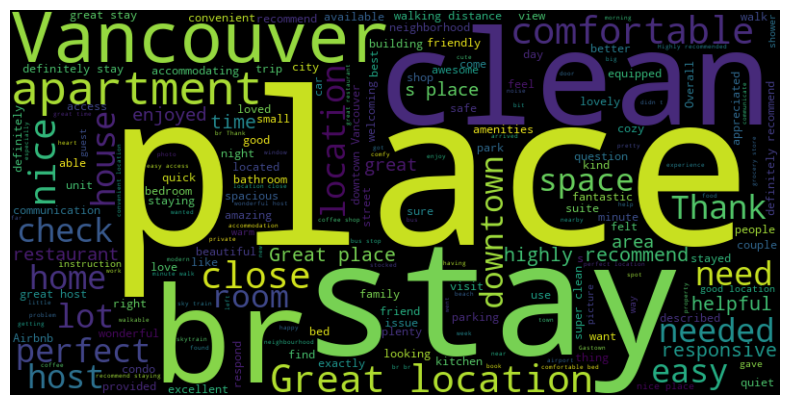

In [68]:
nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

english_comments = sample_data[sample_data['language'] == 'en']

text = " ".join(comment for comment in english_comments['comments'])

wordcloud = WordCloud(stopwords=stop_words, background_color='black', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()